<a href="https://colab.research.google.com/github/sooeun67/DeepLearning/blob/master/Keras_Basic_(2)_CNN_with_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

'''
tf.compat은 텐서플로우 버전 1이랑 2에서 둘 다 돌아가는 코드를 짜기 위해 있는 모듈이라서 뭘 enable 하는 둥 disable 하는 둥 귀찮은 작업이 필요했던 것 같은데요
그냥 이렇게 버전 2를 import하니까 TFDS랑 keras랑 둘 다 아무 문제 없이 잘 돌아가네요.
지금 이 상태에서는 enable_v2_mode()라는 메소드도 없어요 (tf.compat에 포함된 메소드인가봐요)
'''

'\ntf.compat은 텐서플로우 버전 1이랑 2에서 둘 다 돌아가는 코드를 짜기 위해 있는 모듈이라서 뭘 enable 하는 둥 disable 하는 둥 귀찮은 작업이 필요했던 것 같은데요\n그냥 이렇게 버전 2를 import하니까 TFDS랑 keras랑 둘 다 아무 문제 없이 잘 돌아가네요.\n지금 이 상태에서는 enable_v2_mode()라는 메소드도 없어요 (tf.compat에 포함된 메소드인가봐요)\n'

In [2]:
cifar10_builder = tfds.builder("cifar10")
cifar10_builder.download_and_prepare()
datasets = cifar10_builder.as_dataset()
ds_train, ds_test = datasets['train'], datasets['test']

train_images = [data['image'].numpy() for data in ds_train]
train_labels = [data['label'] for data in ds_train]
test_images = [data['image'].numpy() for data in ds_test]
test_labels = [data['label'] for data in ds_test]

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.0.incomplete8WH36S/cifar10-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.0.incomplete8WH36S/cifar10-test.tfrecord


Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.0. Subsequent calls will reuse this data.


(32, 32, 3)

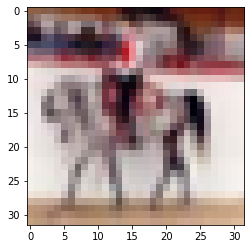

In [3]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
train_images[0].shape

In [0]:
train_images = np.array(train_images) / 255
test_images = np.array(test_images) / 255
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D

model = Sequential()
model.add(Conv2D(4, 8, input_shape=(32, 32, 3)))
model.add(Conv2D(8, 4))
model.add(Conv2D(16, 2))
model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))
model.summary()



# ■■■□□
# □■■■□
# □□■■■
# n = 5, kernel size 3
# n - kernel_size + 1 = 3
# 32
# model.add(Flatten(input_shape=(32, 32, 3)))   
# model.add(Dense(units=128, activation='relu', ))
# model.add(Dense(units=10, activation='softmax'))  # 마지막 차원은 10차원 

model.compile(loss='sparse_categorical_crossentropy', # sparse_categorical_crossentropy는 정답 포맷으로 integer를 받는다고 해요
              optimizer='adam',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=300, batch_size=128)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 4)         772       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 8)         520       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 16)        528       
_________________________________________________________________
flatten (Flatten)            (None, 7056)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                70570     
Total params: 72,390
Trainable params: 72,390
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
391/391 [==============================] - 3s 8ms/step - loss: 1.9062 - accuracy: 0.3315
Epoch 2/300
391/3

In [6]:
predictions = model.predict(test_images)
print(predictions.shape) # 형태: (10000, 10)
predicted_labels = np.argmax(predictions, axis=1) # 형태를 (10000, 10) 에서 (10000, 1)로 바꿈
(predicted_labels == test_labels).mean()

(10000, 10)


0.3682

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

model = Sequential()
model.add(Conv2D(4, 7, input_shape=(32, 32, 3)))
model.add(MaxPool2D())
model.add(Conv2D(8, 4))
model.add(MaxPool2D())
model.add(Conv2D(16, 2))
model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy', # sparse_categorical_crossentropy는 정답 포맷으로 integer를 받는다고 해요
              optimizer='adam',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=300, batch_size=128)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 4)         592       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 8)         520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 16)          528       
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                2

In [6]:
predictions = model.predict(test_images)
print(predictions.shape) # 형태: (10000, 10)
predicted_labels = np.argmax(predictions, axis=1) # 형태를 (10000, 10) 에서 (10000, 1)로 바꿈
(predicted_labels == test_labels).mean()

(10000, 10)


0.5748

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Multi-Layer Perceptron

model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', # sparse_categorical_crossentropy는 정답 포맷으로 integer를 받는다고 해요
              optimizer='adam',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=300, batch_size=32)

Train on 50000 samples
Epoch 1/300
50000/50000 [==============================] - 7s 131us/sample - loss: 1.8920 - accuracy: 0.3229
Epoch 2/300
50000/50000 [==============================] - 6s 125us/sample - loss: 1.7584 - accuracy: 0.3750
Epoch 3/300
50000/50000 [==============================] - 6s 127us/sample - loss: 1.7091 - accuracy: 0.3911
Epoch 4/300
50000/50000 [==============================] - 6s 125us/sample - loss: 1.6771 - accuracy: 0.4042
Epoch 5/300
50000/50000 [==============================] - 6s 125us/sample - loss: 1.6526 - accuracy: 0.4095
Epoch 6/300
50000/50000 [==============================] - 6s 125us/sample - loss: 1.6322 - accuracy: 0.4185
Epoch 7/300
50000/50000 [==============================] - 6s 127us/sample - loss: 1.6143 - accuracy: 0.4281
Epoch 8/300
50000/50000 [==============================] - 6s 125us/sample - loss: 1.6060 - accuracy: 0.4289
Epoch 9/300
50000/50000 [==============================] - 6s 125us/sample - loss: 1.5926 - accuracy: 0.4

In [0]:
predictions = model.predict(test_images)
print(predictions.shape) # 형태: (10000, 10)
predicted_labels = np.argmax(predictions, axis=1) # 형태를 (10000, 10) 에서 (10000, 1)로 바꿈
(predicted_labels == test_labels).mean()

(10000, 10)


0.4334